In [2]:
import pandas as pd
import glob
#FILES=['./swine_h1n1.csv','./swine_h3n2.csv','./h5n1.csv','./h5n2.csv','./h5n6.csv','./h3n2.csv']

#FILES=glob.glob('predictions/*h[0-9]*csv')
FILES=glob.glob('../results/animal_predictions/*csv')
FILES=glob.glob('../results/animal_predictions/combined_results.csv')

seqf=pd.read_csv(FILES[0])
seqf=seqf.rename(columns={'predicted_emergence_score':'IRATe','predicted_impact_score':'IRATi'})


In [3]:
def getInfo(term="A/swine/Minnesota/A02711856/2022",variables=None,lookup=False):
    if not lookup:
        print(term)
        if '/' in term:
            return term.split('/')[2]
        if '_' in term:
            return term.split('_')[2]
    from Bio import Entrez
    Entrez.email = "ishanu@uchicago.edu"    
    handle = Entrez.esearch(db="nucleotide", term=term)
    record = Entrez.read(handle)
    Ldict={}
    for ID in record["IdList"]:
        handle = Entrez.efetch(db="nucleotide", id="2289156410", rettype="gb", retmode="json")
        XML=handle.read()
        LINES=[x.strip() for x in XML.split('\n')]
        LINES=[x[1:]+x[0].replace('/','') for x in LINES if '/' in x[:1] and '=' in x]
        Ldict[ID]={x.split('=')[0]:x.split('=')[1] for x in LINES }
    df=pd.DataFrame(Ldict).transpose().drop_duplicates().transpose()   
    if df.empty:
        return term.split('/')[2]
    return df.loc['country'].values[0]    

In [4]:
def getCountry(row):
    #print(row.id)
    return getInfo(row.id)
seqf['country']=seqf.apply(getCountry, axis=1)
seqf.to_csv('seqf.csv')

A/swine/Missouri/A02524459/2020
A/swine/Ohio/A02524448/2020
A/swine/South_Dakota/A02524453/2020
A/swine/Indiana/A02524458/2020
A/swine/Iowa/A02479424/2020
A/swine/Iowa/A02479430/2020
A/swine/Iowa/A02479425/2020
A/swine/South_Dakota/A02524422/2020
A/swine/Iowa/A02524418/2020
A/swine/North_Carolina/A02479439/2020
A/swine/Iowa/A02524421/2020
A/swine/Minnesota/A02245664/2020
A/swine/Iowa/A02524430/2020
A/swine/Indiana/A02524436/2020
A/swine/Indiana/A02524438/2020
A/swine/Iowa/A02524454/2020
A/swine/Iowa/A02245630/2020
A/swine/Minnesota/A02245637/2020
A/swine/Minnesota/A02245633/2020
A/swine/Texas/A02245632/2020
A/swine/Iowa/A02479310/2020
A/swine/Iowa/A02479301/2020
A/swine/Indiana/A02479315/2020
A/swine/Iowa/A02479306/2020
A/swine/Iowa/A02479309/2020
A/swine/Missouri/A02479312/2020
A/swine/Iowa/A02479307/2020
A/swine/Iowa/A02479303/2020
A/swine/Iowa/A02479343/2020
A/swine/Nebraska/A02479337/2020
A/swine/Wisconsin/A02479334/2020
A/swine/Minnesota/A02479345/2020
A/swine/Minnesota/A02479335/

A/chicken/China/GD2021/2021
A/chicken/China/07/2020
A/quail/Bangladesh/45741/2020
A/chicken/Bangladesh/45567/2020
A/chicken/Bangladesh/45690/2020
A/chicken/Bangladesh/45776/2020
A/chicken/Bangladesh/45563/2020
A/quail/Bangladesh/45745/2020
A/chicken/Bangladesh/45697/2020
A/chicken/Bangladesh/45782/2020
A/quail/Bangladesh/45755/2020
A/chicken/Pakistan/041CP/2020
A/chicken/Pakistan/062BYP/2020
A/chicken/Pakistan/061CP/2020
A/Chicken/Guangdong/GZ15513/2020(H9N2)
A/Chicken/Guangdong/GZ15563/2020(H9N2)
A/White-fronted_Goose/South_Korea/KNU2020-152/2020
A/pheasant/Italy/21VIR2284-1/2021
A/chicken/Korea/SL20/2020
A/chicken/Morocco/17_6650_21RS1333-19/2020
A/chicken/Morocco/14-1_4636_21RS1333-14/2020
A/chicken/Morocco/24_520_21RS1333-28/2021
A/chicken/Morocco/21_4374_21RS1333-23/2020
A/chicken/Morocco/10_4437_21RS1333-10/2020
A/chicken/Morocco/11_4438_21RS1333-11/2020
A/chicken/Morocco/12_4476_21RS1333-12/2020
A/chicken/Morocco/9_4410_21RS1333-9/2020
A/chicken/Morocco/25-2_3155_21RS1333-30/202

In [5]:
af=pd.read_csv('seqf.csv',index_col=0).reset_index()#.country.value_counts()
cf=pd.DataFrame(af.country.value_counts())
cf.columns=['cnt']
cf.index.name='country'
af=af.join(cf,on='country')
cf=cf.reset_index()
af

,index,id,subtype,ha_accession,na_accession,ha,na,HA_Avg_Qdist,ha_variance,NA_Avg_Qdist,na_variance,Geometric_Mean,IRATi,IRATe,country,cnt
0,0,A/swine/Missouri/A02524459/2020,H1N1,EPI1765551,EPI1765552,MKAILVVLLYTFTTANADTLCIGYHANNSTDTVDTVLEKNVTVTHS...,MNANQRIIAIGTVCMIVGIISLLLQIGNIVSLWISHSIQTGWENHT...,0.014602,0.000009,0.029655,0.000013,0.020809,5.959904,6.153482,Missouri,96
1,1,A/swine/Ohio/A02524448/2020,H1N1,EPI1765553,EPI1765554,MKAVLVVLLYTFTTANADTLCIGYHANNSTDTVDTVLEKNVTVTHS...,MNTNQRIITIGTVCLIVGIISLLLQIGNIVSLWVSHSIQTRWENHT...,0.019032,0.000012,0.030905,0.000014,0.024253,5.955118,6.130820,Ohio,71
2,2,A/swine/South_Dakota/A02524453/2020,H1N1,EPI1765555,EPI1765556,MKAILVVLLYTFTTANADTLCIGYHANNSTDTVDTVLEKNVTVTHS...,MNTNQRIITIGTVCMIVGIISLLLQIGNIVSLWISHSIQIEWENHT...,0.015378,0.000012,0.030887,0.000013,0.021794,5.955249,6.145336,South_Dakota,84
3,3,A/swine/Indiana/A02524458/2020,H1N1,EPI1765559,EPI1765560,MKAVLVVLLYTFTTANADTLCIGYHANNSTDTVDTVLEKNVTVTHS...,MNTNQRIITIGTVCLIVGIISLLLQIGNIVSLWVSHSIQTRWENHT...,0.019020,0.000012,0.030905,0.000014,0.024245,5.955118,6.130870,Indiana,212
4,4,A/swine/Iowa/A02479424/2020,H1N1,EPI1766606,EPI1766607,MKAVLVVMLYTFTTANADTLCIGYHANNSTDTVDTVLEKNVTVTHS...,MNTNQRIITIGTVCLIVGIISLLLQIGNIVSLWVSHSIQTRWENHT...,0.016578,0.000012,0.034251,0.000016,0.023829,5.942554,6.126715,Iowa,1013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6061,6061,A/chicken/Guangdong/F94/2022,H9N2,EPI2167482,EPI2167484,MKTVSLITILLAATVSNADKICIGYQSTNSTETVDTLTENNVPVTH...,MNPNQKITAIGSVSLIIAIICLLMQIAILTTTMTLHFGQKECSNPL...,0.021926,0.000166,0.073419,0.011472,0.040122,5.794890,5.944010,Guangdong,24
6062,6062,A/chicken/Guangdong/F99/2022,H9N2,EPI2167503,EPI2167506,MEAVSLITILLAATVSNADKICIGYQSTNSTETVDTLTENNVPVTH...,MNPNQKITAIGSVSLIIAIICLLMQIAILTTTMTLHFRQKECSNPS...,0.018988,0.000092,0.052028,0.014803,0.031431,5.875534,6.043861,Guangdong,24
6063,6063,A/chicken/Egypt/Menoufia/2021,H9N2,EPI2175832,EPI2175833,MEVIPLMIMLLLVTTNNADKICIGHQSTNSTETVDTLTETGVPVTH...,MNPNQRIIALGSASLTVATICLLIQIAILATTMTLHFKQNEYANTS...,0.055346,0.000136,0.461097,0.015276,0.159750,4.333673,4.212729,Egypt,77
6064,6064,A/chicken/South_Korea/SL20/2020,H9N2,EPI2176583,EPI2176585,METVSLITILVVATVSSADKICIGYQSTNSTETVDTLTENNVPVTH...,MNPNQKITAIGSVSLIIAIICLLMQIAILTTTMTFHFGQKECSNPS...,0.029999,0.000109,0.051293,0.014672,0.039227,5.878119,6.003385,South_Korea,23


In [6]:
bf=cf.join(pd.read_csv('seqfgeo',index_col=0).set_index('input_string'),on='country')
uf=bf[bf.latitude.isna()].to_csv('newseqf.csv')

In [7]:
# warning! .. running this too many times costs money
#! ./geocode.py -i newseqf.csv -o newseqfgeo -A country

In [8]:
pd.concat([pd.read_csv('seqfgeo',index_col=0),pd.read_csv('newseqfgeo',index_col=0)]).drop_duplicates().to_csv('seqfgeo')

In [9]:
gf=pd.read_csv('seqfgeo',index_col=0)
geof=seqf.join(gf.set_index('input_string'),on='country')
geof=geof[geof.status=='OK']

In [10]:
import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
import contextily as ctx
import geopandas
import geoplot as gplt
import pylab as plt
import pandas as pd
import matplotlib.cm as cm
import matplotlib as mpl
import numpy as np
import json


In [11]:
geo_DF=geopandas.GeoDataFrame(
    geof, crs="EPSG:4326",geometry=geopandas.points_from_xy(geof.longitude, geof.latitude))
df=geo_DF.to_crs('epsg:4326')
df_=df.to_crs('epsg:4326')
df__ = df.to_crs(epsg=3857) # reproject it in Web mercator
geo_DF__ = geo_DF.to_crs(epsg=3857) # reproject it in Web mercator

In [12]:
def getColor(x,cmap='jet',VMIN=.5,VMAX=1.0,alpha=None):
    if alpha is None:
        alpha=1
    else:
        alpha = (((x-VMIN)/(VMAX-VMIN)))
    if alpha == 1:
        alpha=.999
    norm = mpl.colors.Normalize(vmin=VMIN, vmax=VMAX)
    m = cm.ScalarMappable(norm=norm, cmap=cmap)
    ctup=np.array(list(m.to_rgba(x)))
    ctup[3]=alpha
    return tuple(ctup)

def getColor(x,cmap='jet',VMIN=.5,VMAX=1.0):
    norm = mpl.colors.Normalize(vmin=VMIN, vmax=VMAX)
    m = cm.ScalarMappable(norm=norm, cmap=cmap)
    return m.to_rgba(x)

def mssize(x):
    return ((3.5**(x-2))) + (x>6.76)*900 + 40
#        return ((4.5**(x-2))) + (x>6.5)*200
def mssize1(x):
    return ((3.25**(x-2))) + (x>6.2)*900 + 40
#        return ((4.5**(x-2))) + (x>6.5)*200

    


def plotRisk(df,ax,variable='IRATe',ALPHA=.2,COL=None,mssize=mssize,colR=1,colG=.3,colB=.3,colalpha=.2,
             cmap='jet',VMIN=0,VMAX=None,markersize=20,markeredgecolor='w'):
    #df=df.sort_values(variable,ascending=True)
    if VMAX is None:
        VMAX=1
        
   
    #MS = lambda x: ((4.5**(x-2))) 
    MS = lambda x: mssize(x) 
    
    df.plot(
        ax=ax,
        markersize=markersize* MS(df[variable]),
        edgecolor=markeredgecolor,lw=.5,
        color=(colR,colG,colB,colalpha),#'k',#getColor(df[variable],cmap=cmap,VMIN=VMIN,VMAX=VMAX),
        #alpha=ALPHA
    )
    #fraction=.025
    #norm = mpl.colors.Normalize(vmin=VMIN, vmax=VMAX)
    #cax = ax.inset_axes([.4, 0.1, 0.3, 0.025])
    #cbar = ax.figure.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),orientation='horizontal',
    #        ax=ax, cax=cax,pad=.0, fraction=fraction)
    #cbar.ax.set_title('estimated IRAT emergence score',fontsize=20,color='k')
    #cbar.ax.tick_params(labelsize=20,labelcolor='k')
    
    return ax    

def saveFIG(filename='tmp.pdf'):
    import pylab as plt
    plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
    plt.margins(0,0)
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
    plt.savefig(filename,dpi=300, bbox_inches = 'tight',pad_inches = 0,transparent=True) 
    return

In [45]:
tf=geo_DF__[geo_DF__.id.isin(['A/swine/Indiana/A02524710/2020','A/swine/Missouri/A02524711/2020'])]
tf#.transpose()

,id,subtype,ha_accession,na_accession,ha,na,HA_Avg_Qdist,ha_variance,NA_Avg_Qdist,na_variance,...,formatted_address,latitude,longitude,accuracy,google_place_id,type,postcode,number_of_results,status,geometry
218,A/swine/Missouri/A02524711/2020,H1N1,EPI1818121,EPI1818122,MKAILVVMLYTFTTANADTLCIGYHANNSTDTVDTVLEKNVTVTHS...,MNPNQKIITIGSICMTIGTANLILQIGNIISIWVSHSIQIGNQSQI...,0.007931,9.678707e-06,0.001876,0.000002,...,"Missouri, USA",37.964253,-91.831833,APPROXIMATE,ChIJfeMiSNXmwIcRcr1mBFnEW7U,"administrative_area_level_1,political",NaN,1,OK,POINT (-10222672.933 4574377.177)
1902,A/swine/Indiana/A02524710/2020,H3N2,EPI1818137,EPI1818138,MKTIIALSYILCLVFAQKIPGNDNGTATLCLGHHAVPNGTIVKTIT...,MNPNQKIITIGSVSLTISTICFFMQIAILITTIALHFKQYEFNSPP...,0.004542,4.497950e-07,0.006619,0.000001,...,"Indiana, USA",40.267194,-86.134902,APPROXIMATE,ChIJHRv42bxQa4gRcuwyy84vEH4,"administrative_area_level_1,political",NaN,1,OK,POINT (-9588493.419 4904846.506)


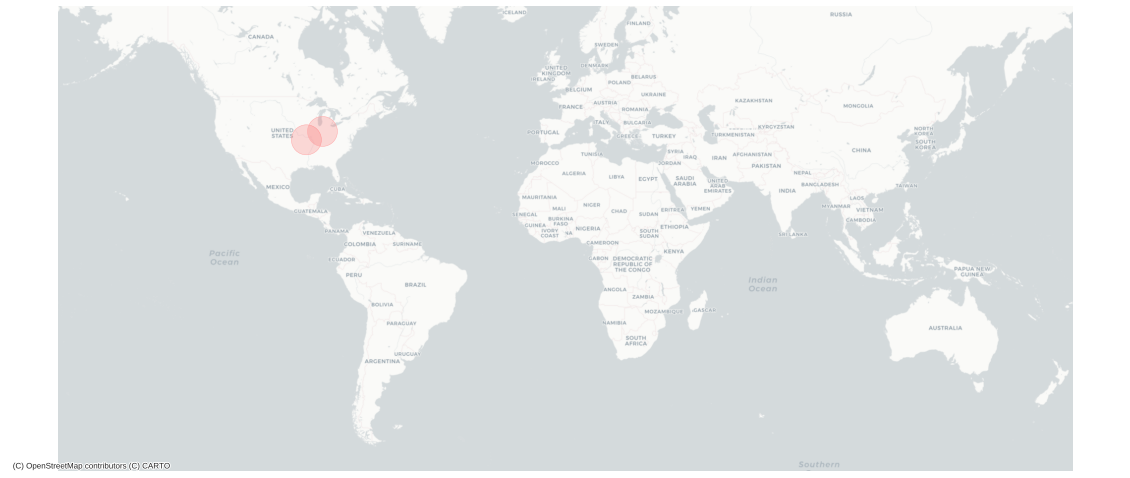

In [46]:
from matplotlib import cm
cmap = cm.gist_rainbow
cmap = cm.gray
#import 
fname1='./WB_Coastlines_10m/WB_Coastlines_10m.shp'
df1 = geopandas.read_file(fname1)
plt.style.use('dark_background')
plt.style.use('seaborn-whitegrid')
df1__ = df1.to_crs(epsg=3857) # reproject it in Web mercator
ax1 = df1__.plot(figsize=(20,20), alpha=.05, edgecolor='w')
variable='IRATi'
#cmap='gnuplot2'
#cmap='viridis'
#cmap=plt.get_cmap('cool')
VMIN=geo_DF__.IRATe.min()
VMAX=geo_DF__.IRATe.max()

geo_DF___=geo_DF__[geo_DF__.IRATe>6.2]
geo_DF____=geo_DF__[geo_DF__.IRATe<=6.2]


ALPHA=1
#plotRisk(geo_DF____,ax=ax1,cmap=cmap,markersize=.4,ALPHA=ALPHA,
#         markeredgecolor='#ffaaaa',VMIN=geo_DF__.IRATe.min(),
#         VMAX=geo_DF__.IRATe.max())
#plotRisk(geo_DF___,ax=ax1,cmap=cmap,markersize=1.5,ALPHA=ALPHA,
#         markeredgecolor='#ffaaaa',variable='IRATe',VMIN=geo_DF__.IRATe.min(),
#         VMAX=geo_DF__.IRATe.max())
# plotRisk(geo_DF___,ax=ax1,cmap=cmap,markersize=1.5,ALPHA=ALPHA,
#          markeredgecolor='#ffaaaa',variable='IRATe',VMIN=geo_DF__.IRATi.min(),
#          VMAX=geo_DF__.IRATi.max())
plotRisk(tf,ax=ax1,cmap=cmap,markersize=3.5,ALPHA=ALPHA,
         markeredgecolor='#ffaaaa',variable='IRATe',VMIN=geo_DF__.IRATi.min(),
         VMAX=geo_DF__.IRATi.max())


#ctx.add_basemap(ax1,source=ctx.providers.Stamen.TonerLite,alpha=1)
ctx.add_basemap(ax1,source=ctx.providers.CartoDB.Positron,alpha=1)
#ctx.add_basemap(ax1,source=ctx.providers.Stamen.Toner)
#ctx.add_basemap(ax1,source=ctx.providers.Stamen.Watercolor,alpha=.5)
#ctx.add_basemap(ax1,source=ctx.providers.NASAGIBS.ViirsEarthAtNight2012,alpha=1)
#ax1.set_ylim(-.92e7,None)
ax1.set_ylim(-.85e7,.985e7)
ax1.set_axis_off()
#saveFIG(filename='bionorad_black.png')
#saveFIG(filename='../../tex/overleaf/Figures/bionorad_wcol.png')

In [47]:
geo_DF__.columns

Index(['id', 'subtype', 'ha_accession', 'na_accession', 'ha', 'na',
       'HA_Avg_Qdist', 'ha_variance', 'NA_Avg_Qdist', 'na_variance',
       'Geometric_Mean', 'IRATi', 'IRATe', 'country', 'formatted_address',
       'latitude', 'longitude', 'accuracy', 'google_place_id', 'type',
       'postcode', 'number_of_results', 'status', 'geometry'],
      dtype='object')

In [48]:
allriskystrains=pd.read_csv('../../irat_qnet/results/animal_predictions/allriskystrains_collapsed.csv',index_col=0)
allriskystrains

,subtype,ha_accession,na_accession,predicted_impact_score,predicted_emergence_score
id,,,,,
A/swine/Missouri/A02524711/2020,H1N1,EPI1818121,EPI1818122,6.064677,6.294432
A/swine/Indiana/A02524710/2020,H3N2,EPI1818137,EPI1818138,6.046863,6.288258
A/swine/Iowa/A02524671/2020,H1N1,EPI1817876,EPI1817877,6.064644,6.286570
A/swine/Colorado/A02245815/2020,H1N1,EPI1908176,EPI1908177,6.048339,6.283546
A/swine/Indiana/A02479362/2020,H3N2,EPI1769192,EPI1769194,6.046717,6.282750
...,...,...,...,...,...
A/chicken/Guangdong/F92/2022,H9N2,EPI2167451,EPI2167454,5.870310,6.008246
A/swine/Italy/20-5709-1/2020,H1N1,EPI1911502,EPI1911504,5.950796,6.007007
A/swine/France/28-200396/2020,H1N1,EPI1975673,EPI1975677,5.955392,6.005299


In [49]:
riskystrains=[x for x in geo_DF__.id if x in allriskystrains.index.values]

risky_geo_df=geo_DF__.set_index('id').loc[riskystrains,:].reset_index()

In [50]:
pf_=geo_DF__.copy()
pf_['xscore']=np.sqrt(geo_DF__.IRATe*geo_DF__.IRATi)
pf__=pf_.copy()
F=1
def perturb_coord1(row):
    return row.latitude+F*np.random.rand()
def perturb_coord2(row):
    return row.longitude+F*np.random.rand()
pf_['latitude']=pf_.apply(perturb_coord1,axis=1)
pf_['longitude']=pf_.apply(perturb_coord2,axis=1)
pf_=pf_[['id','IRATi','IRATe','xscore','country','latitude','longitude','subtype']]
pf_=geopandas.GeoDataFrame(
    pf_, crs="EPSG:4326",geometry=geopandas.points_from_xy(pf_.longitude, pf_.latitude)).to_crs(epsg=3857)

In [51]:
NUM=244

In [52]:
pf=pf_.sort_values('IRATe',ascending=False).head(NUM)
pf1=pf_.sort_values('IRATe',ascending=False).tail(pf_.index.size-NUM)
pf1=pf__.set_index('id').loc[pf1.id]

In [53]:
pf=risky_geo_df.copy()
pf[pf.subtype=='H9N2']

,id,subtype,ha_accession,na_accession,ha,na,HA_Avg_Qdist,ha_variance,NA_Avg_Qdist,na_variance,...,formatted_address,latitude,longitude,accuracy,google_place_id,type,postcode,number_of_results,status,geometry
233,A/chicken/Hebei/045/2020,H9N2,EPI1897202,EPI1898047,METVSLITILVVATVSNADKICIGYQSTNSTETVDTLTESNVPVTH...,MNPNQKITAIGSVSLIIAIICLLMQIAILTTTMTLHFAQKECSNPS...,0.028678,0.000118,0.046023,0.015446,...,"Hebei, China",38.03599,114.469790,APPROXIMATE,ChIJ1YZMyjCpjDURIfse5yIKRWA,"administrative_area_level_1,political",NaN,1,OK,POINT (12742718.734 4584511.227)
234,A/chicken/China/07/2020,H9N2,EPI1904660,EPI1904662,METVSLITILVVATVSNADKICIGYQSTNSTETVDTLTENNVPVTH...,MNPNQKITAIGSVSLIIAIICLLMQIAILTTTMTLHFGQKECSNPS...,0.023692,0.000127,0.046566,0.015398,...,China,35.86166,104.195397,APPROXIMATE,ChIJwULG5WSOUDERbzafNHyqHZU,"country,political",NaN,1,OK,POINT (11598978.537 4281602.660)
235,A/chicken/China/2038/2020,H9N2,EPI2116773,EPI2116771,METVSLITILLAATVSNADKICIGYQSTNSTETVDTLTENNVPVTH...,MNPNQKITAIGSVSLIIAIICLLMQIAILTTTMTLHFGQKECSNPS...,0.020267,0.000119,0.048305,0.015117,...,China,35.86166,104.195397,APPROXIMATE,ChIJwULG5WSOUDERbzafNHyqHZU,"country,political",NaN,1,OK,POINT (11598978.537 4281602.660)
236,A/chicken/China/2042/2020,H9N2,EPI2116789,EPI2116787,METASLITVLLVVTVSNADKICIGYQSTNSTETVDTLTENNVPVTH...,MNPNQKITAIGSVSLTIAIICLLIQIAILTTTMTLHFGQKECSNPS...,0.021413,0.000061,0.046503,0.015409,...,China,35.86166,104.195397,APPROXIMATE,ChIJwULG5WSOUDERbzafNHyqHZU,"country,political",NaN,1,OK,POINT (11598978.537 4281602.660)
237,A/chicken/China/2068/2020,H9N2,EPI2116813,EPI2116811,METVSLITILLVAAVSNADKICIGYQSTNSTETVDTLTENNVPVTH...,MNPNQKITAIGSVSLIIAIICLLMQIAILTMTMTLHFRQNECSNPS...,0.022341,0.000099,0.050187,0.015110,...,China,35.86166,104.195397,APPROXIMATE,ChIJwULG5WSOUDERbzafNHyqHZU,"country,political",NaN,1,OK,POINT (11598978.537 4281602.660)
238,A/chicken/China/2088/2020,H9N2,EPI2116821,EPI2116819,METVSLITILLAATVSNADKICIGYQSTNSTETVDTLTENNVPVTH...,MNPNQKITAIGSVSLIIAIICLLMQIAILTTTMTLHFGQKECNNPS...,0.022044,0.000166,0.046536,0.015418,...,China,35.86166,104.195397,APPROXIMATE,ChIJwULG5WSOUDERbzafNHyqHZU,"country,political",NaN,1,OK,POINT (11598978.537 4281602.660)
239,A/chicken/China/2096/2021,H9N2,EPI2116845,EPI2116843,METVSLITILLAATVSNADKICIGYQSTNSTETVDTLTENNVPVTH...,MNPNQKITAIGSVSLTIAIICLLMQIAILTTTMTLHFGQKECSNPS...,0.020196,0.000129,0.047576,0.015350,...,China,35.86166,104.195397,APPROXIMATE,ChIJwULG5WSOUDERbzafNHyqHZU,"country,political",NaN,1,OK,POINT (11598978.537 4281602.660)
240,A/mink/China/chick_embryo/2020,H9N2,EPI2161544,EPI2161548,METVSLITILLAATVSNADKICIGYQSSNSTETVDTLTENNVPVTH...,MNPNQKITAIGSVSLIIAIICLLMQIAILTMTMTLHFGQKECSNPS...,0.016908,0.000129,0.046149,0.015536,...,China,35.86166,104.195397,APPROXIMATE,ChIJwULG5WSOUDERbzafNHyqHZU,"country,political",NaN,1,OK,POINT (11598978.537 4281602.660)
241,A/chicken/Guangdong/F92/2022,H9N2,EPI2167451,EPI2167454,METISLITILLAATVSNADKICIGYQSTNSTETVDTLTENNVPVTH...,MNPNQKITAIGSVSLIIAIICLLMQIAILTTTMTLHFGQKECSNPS...,0.026589,0.000122,0.053381,0.015143,...,"Guangdong Province, China",23.13171,113.266270,APPROXIMATE,ChIJP1yvMvGFUjERKZ8lCW8c1C4,"administrative_area_level_1,political",NaN,1,OK,POINT (12608743.500 2647954.512)
242,A/chicken/Guangdong/F99/2022,H9N2,EPI2167503,EPI2167506,MEAVSLITILLAATVSNADKICIGYQSTNSTETVDTLTENNVPVTH...,MNPNQKITAIGSVSLIIAIICLLMQIAILTTTMTLHFRQKECSNPS...,0.018988,0.000092,0.052028,0.014803,...,"Guangdong Province, China",23.13171,113.266270,APPROXIMATE,ChIJP1yvMvGFUjERKZ8lCW8c1C4,"administrative_area_level_1,political",NaN,1,OK,POINT (12608743.500 2647954.512)


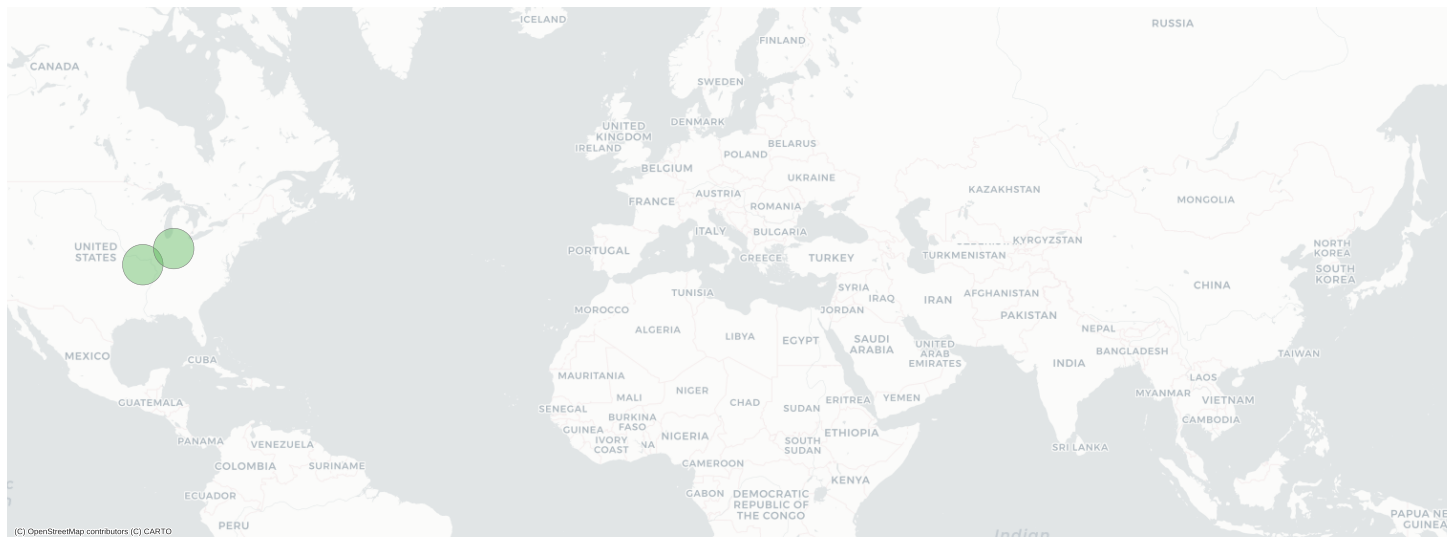

In [56]:
cmap = cm.gist_rainbow
cmap = cm.gray
TVAR='IRATe'

fname1='./WB_Coastlines_10m/WB_Coastlines_10m.shp'
df1 = geopandas.read_file(fname1)
plt.style.use('dark_background')
plt.style.use('seaborn-whitegrid')
df1__ = df1.to_crs(epsg=3857) # reproject it in Web mercator
ax1 = df1__.plot(figsize=(20,20), alpha=.0, edgecolor='w')
VMIN=pf[TVAR].min()
VMAX=pf[TVAR].max()

ALPHA=1
plotRisk(tf,ax=ax1,cmap=cmap,markersize=1.5,ALPHA=ALPHA,mssize=mssize1,
         markeredgecolor='#777777',variable=TVAR,VMIN=VMIN,colalpha=.4,colR=0.3,colG=.7,colB=0.3,
         VMAX=VMAX)


ctx.add_basemap(ax1,source=ctx.providers.CartoDB.Positron,alpha=.7)
ax1.set_ylim(-.1e7,.985e7)
ax1.set_xlim(-1.3e7,1.65e7)
ax1.set_axis_off()
saveFIG(filename='../../tex/Figures/bionorad_tmp.pdf')

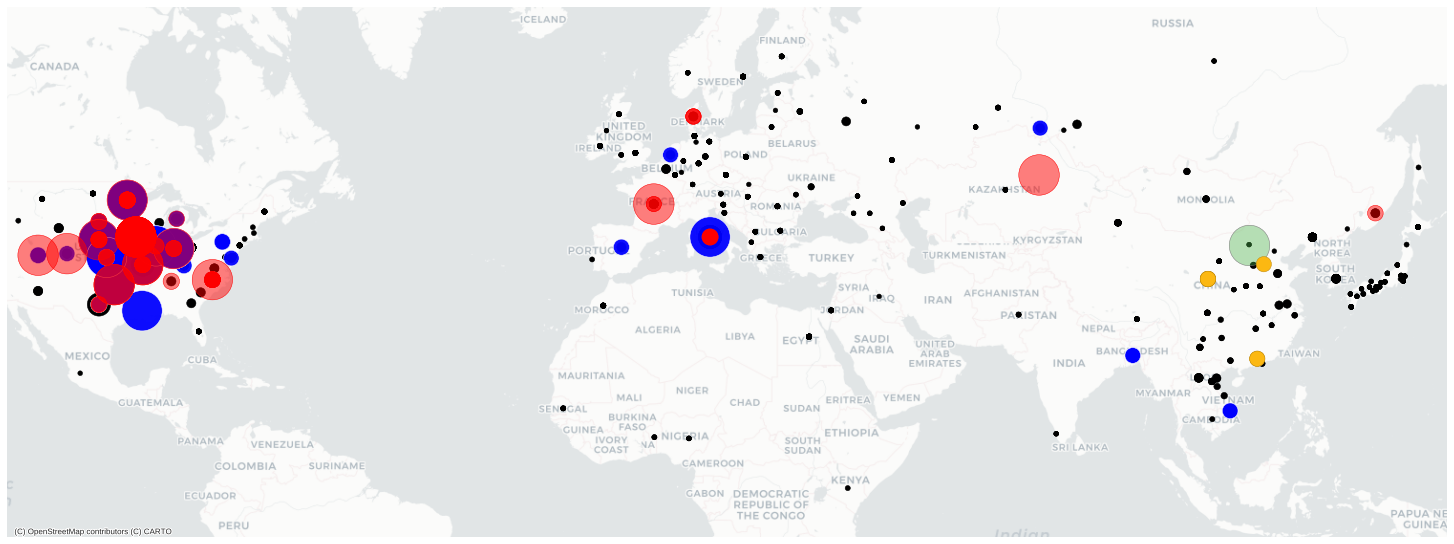

In [60]:
cmap = cm.gist_rainbow
cmap = cm.gray
TVAR='IRATe'

fname1='./WB_Coastlines_10m/WB_Coastlines_10m.shp'
df1 = geopandas.read_file(fname1)
plt.style.use('dark_background')
plt.style.use('seaborn-whitegrid')
df1__ = df1.to_crs(epsg=3857) # reproject it in Web mercator
ax1 = df1__.plot(figsize=(20,20), alpha=.0, edgecolor='w')
VMIN=pf[TVAR].min()
VMAX=pf[TVAR].max()

ALPHA=1
plotRisk(pf1,ax=ax1,cmap=cmap,markersize=.5,ALPHA=ALPHA,mssize=mssize1,
         markeredgecolor=None,variable=TVAR,VMIN=VMIN,colalpha=1,colR=0,colG=0,colB=0,
         VMAX=VMAX)

plotRisk(pf[pf.subtype=='H7N9'],ax=ax1,cmap=cmap,markersize=1.5,ALPHA=ALPHA,mssize=mssize1,
         markeredgecolor='#777777',variable=TVAR,VMIN=VMIN,colalpha=.4,colR=0.3,colG=.7,colB=0.3,
         VMAX=VMAX)

plotRisk(pf[pf.subtype=='H3N2'],ax=ax1,cmap=cmap,markersize=1.5,ALPHA=ALPHA,mssize=mssize1,
         markeredgecolor=(1,1,1,1),variable=TVAR,VMIN=VMIN,colalpha=.95,colR=0,colG=0,colB=1,
         VMAX=VMAX)

plotRisk(pf[pf.subtype=='H9N2'],ax=ax1,cmap=cmap,markersize=1.5,ALPHA=ALPHA,mssize=mssize1,
         markeredgecolor='#BD890F',variable=TVAR,VMIN=VMIN,colalpha=1,colR=0.99,colG=.72,colB=0.07,
         VMAX=VMAX)

plotRisk(pf[pf.subtype=='H1N1'],ax=ax1,cmap=cmap,markersize=1.5,ALPHA=ALPHA,mssize=mssize1,
         markeredgecolor='#ff0000',variable=TVAR,VMIN=VMIN,colalpha=.5,colR=1,colG=0,colB=0,
         VMAX=VMAX)


#ctx.add_basemap(ax1,source=ctx.providers.Stamen.TonerLite,alpha=.5)
ctx.add_basemap(ax1,source=ctx.providers.CartoDB.Positron,alpha=.7)
#ctx.add_basemap(ax1,source=ctx.providers.Stamen.Toner)
#ctx.add_basemap(ax1,source=ctx.providers.Stamen.Watercolor,alpha=.5)
#ctx.add_basemap(ax1,source=ctx.providers.NASAGIBS.ViirsEarthAtNight2012,alpha=1)
#ax1.set_ylim(-.85e7,.985e7)
ax1.set_ylim(-.1e7,.985e7)
ax1.set_xlim(-1.3e7,1.65e7)
ax1.set_axis_off()
saveFIG(filename='../../tex/Figures/bionorad.pdf')

In [95]:
pf.subtype.value_counts()

H1N1    127
H3N2    105
H9N2     10
H7N9      1
Name: subtype, dtype: int64

In [96]:
pf.sort_values('IRATi',ascending=False)#[pf.subtype=='h7']

,id,subtype,ha_accession,na_accession,ha,na,HA_Avg_Qdist,ha_variance,NA_Avg_Qdist,na_variance,...,formatted_address,latitude,longitude,accuracy,google_place_id,type,postcode,number_of_results,status,geometry
232,A/Camel/Inner_Mongolia/XL/2020,H7N9,EPI2026200,EPI2026202,MNTQILVFALIAIIPTNADKICLGHHAVSNGTKVNTLTEREVEVVN...,MNPNQKILCTSATAITIGAIAVLIGIANLGLNIGLHLKPGCNCSHS...,0.014006,2.854999e-03,0.001182,2.218687e-07,...,"Inner Mongolia, China",40.817330,111.765220,APPROXIMATE,ChIJ3xRp0kvMBTYRUOnCbYFGl9U,"administrative_area_level_1,political",NaN,1,OK,POINT (12441647.379 4985435.088)
40,A/swine/Missouri/A02524711/2020,H1N1,EPI1818121,EPI1818122,MKAILVVMLYTFTTANADTLCIGYHANNSTDTVDTVLEKNVTVTHS...,MNPNQKIITIGSICMTIGTANLILQIGNIISIWVSHSIQIGNQSQI...,0.007931,9.678707e-06,0.001876,2.438430e-06,...,"Missouri, USA",37.964253,-91.831833,APPROXIMATE,ChIJfeMiSNXmwIcRcr1mBFnEW7U,"administrative_area_level_1,political",NaN,1,OK,POINT (-10222672.933 4574377.177)
39,A/swine/Iowa/A02524671/2020,H1N1,EPI1817876,EPI1817877,MKAILVVLLYTFTTANADTLCIGYHANNSTDTVDTVLEKNVTVTHS...,MNPNQKIITIGSICMTIGTANLILQIGNIISIWVSHSIQIGNQSQI...,0.009921,1.642283e-05,0.001876,2.438430e-06,...,"Iowa, USA",41.878003,-93.097702,APPROXIMATE,ChIJGWD48W9e7ocR2VnHV0pj78Y,"administrative_area_level_1,political",NaN,1,OK,POINT (-10363588.781 5142722.292)
33,A/swine/North_Carolina/A02479173/2020,H1N1,EPI1780425,EPI1780426,MKAILVVLLYAFTTANADTLCIGYHANNSTDTVDTVLEKNVTVTHS...,MNPNQKIITIGSICMTIGTANLILQIGNIISIWVSHSIQIGNQSQI...,0.024268,1.771656e-05,0.001876,2.438430e-06,...,"North Carolina, USA",35.759573,-79.019300,APPROXIMATE,ChIJgRo4_MQfVIgRGa4i6fUwP60,"administrative_area_level_1,political",NaN,1,OK,POINT (-8796388.205 4267589.232)
118,A/swine/Tennessee/A02524414/2022,H1N1,EPI2149257,EPI2149258,MKAILLVLLHTLATANADTICIGYHANNSTDTVDTVLEKNVTVTHS...,MNPNQKIITIGSICMTIGTANLILQIGNIISIWVSHSIQIGNQSQI...,0.035522,1.467385e-05,0.002849,2.479578e-06,...,"Tennessee, USA",35.517491,-86.580447,APPROXIMATE,ChIJA8-XniNLYYgRVpGBpcEgPgM,"administrative_area_level_1,political",NaN,1,OK,POINT (-9638091.306 4234430.426)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,A/swine/Iowa/A02525173/2021,H3N2,EPI1908983,EPI1908984,MKTIIALSHILCLVFAQKLPGNDNNMATLCLGHHAVPNGTIVKTIT...,MNPNQKIITIGSVSLIIATICFLIQIAILATTITLHFKQHNCDSSP...,0.007867,6.949033e-07,0.067569,4.620837e-05,...,"Iowa, USA",41.878003,-93.097702,APPROXIMATE,ChIJGWD48W9e7ocR2VnHV0pj78Y,"administrative_area_level_1,political",NaN,1,OK,POINT (-10363588.781 5142722.292)
141,A/swine/Illinois/A02479065/2020,H3N2,EPI1779440,EPI1779441,MKTIIALSHILYLVFAQKLPGNDNNMATLCLGHHAVPNGTIVKTIT...,MNPNQKIITIGSVSLIIATICFLMQIAILMTTITLHFKQHNCDFSP...,0.008748,8.586171e-07,0.068307,4.720016e-05,...,"Illinois, USA",40.633125,-89.398528,APPROXIMATE,ChIJGSZubzgtC4gRVlkRZFCCFX8,"administrative_area_level_1,political",NaN,1,OK,POINT (-9951798.648 4958377.351)
146,A/swine/Missouri/A02524672/2020,H3N2,EPI1817880,EPI1817881,MRTIIALSHILCLVFAQKLPGNDNNMATLCLGHHAVPNGTIVKTIT...,MNPNQKIITIGSVSLIIATICFLMQIATLVTTITLHFKQHNCDSSP...,0.007939,7.012808e-07,0.068925,4.805832e-05,...,"Missouri, USA",37.964253,-91.831833,APPROXIMATE,ChIJfeMiSNXmwIcRcr1mBFnEW7U,"administrative_area_level_1,political",NaN,1,OK,POINT (-10222672.933 4574377.177)
192,A/swine/Iowa/A02636091/2021,H3N2,EPI1931843,EPI1931844,MKTIITLSHILCLVFAQKLPGNDNNMATLCLGHHAVPNGTIVKTIT...,MNPNQKIITIGSVSLIIATICFLMQIATLVTTITLHFKQHNCDSSP...,0.008933,8.677246e-07,0.069015,4.818320e-05,...,"Iowa, USA",41.878003,-93.097702,APPROXIMATE,ChIJGWD48W9e7ocR2VnHV0pj78Y,"administrative_area_level_1,political",NaN,1,OK,POINT (-10363588.781 5142722.292)


In [97]:
pf1.sort_values('xscore').xscore

id
A/chicken/Bulgaria/221_20VIR1725-1/2020                    3.388310
A/duck/Tottori/Vac-T2/2021                                 3.420834
A/Bean_Goose(Anser_fabalis)/South_Korea/KNU2021-25/2021    3.421371
A/Bean_Goose(Anser_fabalis)/South_Korea/KNU2021-50/2021    3.421818
A/Bean_Goose(Anser_fabalis)/South_Korea/H5N8/2021          3.421910
                                                             ...   
A/swine/Iowa/A02524845/2020                                6.109066
A/swine/Italy/56910/2020                                   6.111926
A/swine/Iowa/A02636162/2021                                6.114658
A/swine/Tennessee/A02524414/2022                           6.120680
A/swine/Minnesota/A02635976/2021                           6.125495
Name: xscore, Length: 5683, dtype: float64

KeyError: 'xscore'

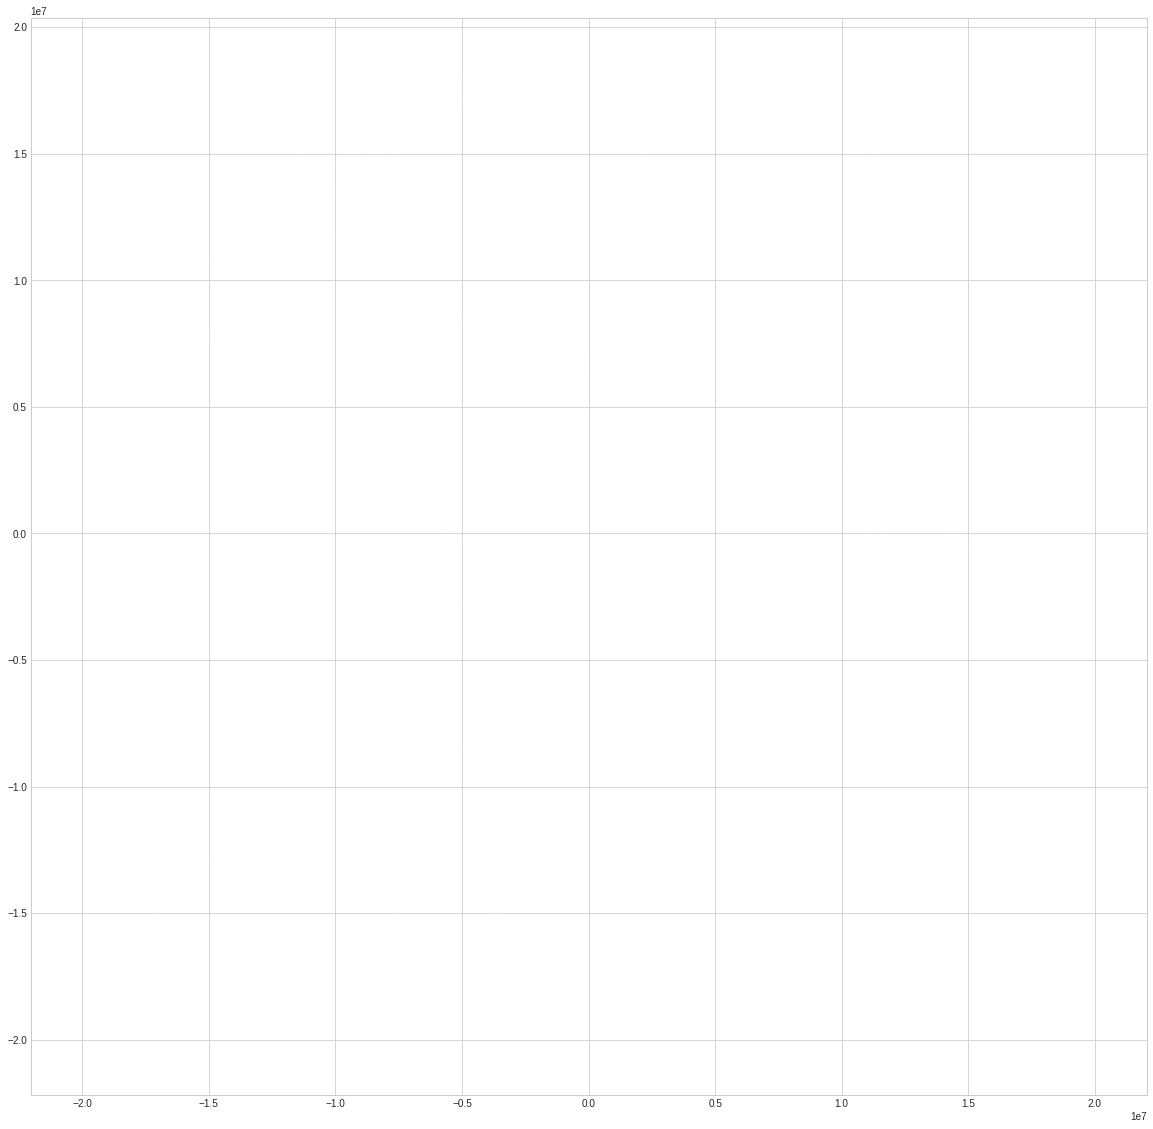

In [98]:
cmap = cm.gist_rainbow
cmap = cm.gray
TVAR='xscore'

fname1='./WB_Coastlines_10m/WB_Coastlines_10m.shp'
df1 = geopandas.read_file(fname1)
plt.style.use('dark_background')
plt.style.use('seaborn-whitegrid')
df1__ = df1.to_crs(epsg=3857) # reproject it in Web mercator
ax1 = df1__.plot(figsize=(20,20), alpha=.05, edgecolor='w')
VMIN=pf[TVAR].min()
VMAX=pf[TVAR].max()

ALPHA=1
#A/Chicken/Hebei/1011/2021	
plotRisk(pf[pf.id=='A/swine/Missouri/A02524711/2020'],ax=ax1,cmap=cmap,markersize=1.5,ALPHA=ALPHA,mssize=mssize1,
         markeredgecolor='#777777',variable=TVAR,VMIN=VMIN,colalpha=.4,colR=0.3,colG=.7,colB=0.3,
         VMAX=VMAX)



#ctx.add_basemap(ax1,source=ctx.providers.Stamen.TonerLite,alpha=1)
ctx.add_basemap(ax1,source=ctx.providers.CartoDB.Positron,alpha=1)
#ctx.add_basemap(ax1,source=ctx.providers.Stamen.Toner)
#ctx.add_basemap(ax1,source=ctx.providers.Stamen.Watercolor,alpha=.5)
#ctx.add_basemap(ax1,source=ctx.providers.NASAGIBS.ViirsEarthAtNight2012,alpha=1)
#ax1.set_ylim(-.85e7,.985e7)
ax1.set_ylim(-.1e7,.985e7)
ax1.set_xlim(-1.3e7,1.65e7)
ax1.set_axis_off()

In [160]:
pf_

,id,IRATi,IRATe,xscore,country,latitude,longitude,subtype,geometry
0,A/swine/Missouri/A02524459/2020,6.204217,6.343788,6.273614,Missouri,41.585577,-89.513670,H1N1,POINT (-9964616.115 5099101.638)
1,A/swine/Ohio/A02524448/2020,6.144562,6.276626,6.210243,Ohio,44.685882,-78.727774,H1N1,POINT (-8763935.759 5572204.799)
2,A/swine/South_Dakota/A02524453/2020,6.182426,6.321932,6.251790,South_Dakota,46.452737,-96.304209,H1N1,POINT (-10720535.516 5853199.895)
3,A/swine/Indiana/A02524458/2020,6.144680,6.276771,6.210374,Indiana,42.724667,-83.717961,H1N1,POINT (-9319440.794 5270156.764)
4,A/swine/Iowa/A02479424/2020,6.133895,6.274830,6.203962,Iowa,43.821602,-90.797388,H1N1,POINT (-10107519.010 5437876.040)
...,...,...,...,...,...,...,...,...,...
6061,A/chicken/Guangdong/F94/2022,5.718959,5.883612,5.800701,Guangdong,23.227196,114.792576,H9N2,POINT (12778651.156 2659517.320)
6062,A/chicken/Guangdong/F99/2022,5.935981,6.089459,6.012230,Guangdong,26.297067,114.252931,H9N2,POINT (12718578.112 3035920.744)
6063,A/chicken/Egypt/Menoufia/2021,3.594084,3.700304,3.646807,Egypt,29.752910,33.453497,H9N2,POINT (3724026.260 3471828.105)
6064,A/chicken/South_Korea/SL20/2020,5.826564,5.956565,5.891206,South_Korea,38.928342,131.010455,H9N2,POINT (14584017.179 4711412.350)


In [162]:
seqf.columns

Index(['id', 'subtype', 'ha_accession', 'na_accession', 'ha', 'na',
       'HA_Avg_Qdist', 'ha_variance', 'NA_Avg_Qdist', 'na_variance',
       'Geometric_Mean', 'IRATi', 'IRATe', 'country'],
      dtype='object')

In [174]:
af=seqf[['id', 'subtype', 'ha_accession', 'na_accession','HA_Avg_Qdist', 'NA_Avg_Qdist', 
       'Geometric_Mean', 'IRATi', 'IRATe', 'country']].set_index('id')
af['xscore']=np.sqrt(af.IRATe*af.IRATi)


In [175]:
af.sort_values('xscore',ascending=False).head(30)

,subtype,ha_accession,na_accession,HA_Avg_Qdist,NA_Avg_Qdist,Geometric_Mean,IRATi,IRATe,country,xscore
id,,,,,,,,,,
A/chicken/Bulgaria/221_20VIR1725-1/2020,H5N2,EPI1807323,EPI1807322,0.360115,0.515498,0.430858,8.820983,6.428702,Bulgaria,7.530436
A/Chicken/Hebei/1011/2021,H7N9,EPI1857201,EPI1857203,0.275500,0.003280,0.030061,7.723600,6.695683,Hebei,7.191299
A/chicken/Northern_China/BJ3426/2020(H7N9),H7N9,EPI1921166,EPI1921168,0.265758,0.003426,0.030175,7.656849,6.674473,Northern_China,7.148806
A/chicken/Northern_China/SX1616/2020(H7N9),H7N9,EPI1921174,EPI1921176,0.267466,0.003661,0.031291,7.640830,6.654542,Northern_China,7.130654
A/Chicken/Yunnan/1001/2021,H7N9,EPI1856832,EPI1856833,0.273779,0.005125,0.037458,7.534598,6.540486,Yunnan,7.019967
A/Chicken/Shanxi/1012/2021,H7N9,EPI1857209,EPI1857211,0.275467,0.005221,0.037925,7.534718,6.534361,Shanxi,7.016734
A/Chicken/Yunnan/1002/2021,H7N9,EPI1856840,EPI1856841,0.273779,0.005172,0.037628,7.530594,6.537056,Yunnan,7.016261
A/Chicken/Yunnan/1004/2021,H7N9,EPI1856859,EPI1856861,0.273779,0.005183,0.037669,7.529632,6.536232,Yunnan,7.015370
A/Chicken/Yunnan/1003/2021,H7N9,EPI1856848,EPI1856849,0.273800,0.005185,0.037678,7.529556,6.536089,Yunnan,7.015258
